In [4]:
import csv as csv

## Task: Analyze Token Transaction Behavior from Simulated Web3 Wallet Data

### Objective:
Analyze a dataset of on-chain token transfers to identify wallet behaviors, token usage trends, and total transaction volumes using Pandas and NumPy.

Dataset Description:
Each row represents a token transfer between wallets.
Download Data Here

Task Requirements:
NOTE: You may simulate this dataset using numpy and pandas if actual data isn't available.

## Step-by-Step Instructions:
🔹 1. Data Preparation
Load the dataset from a CSV or generate 500–1000 random rows using numpy (e.g., random wallets, tokens, amounts).
Parse the timestamp column as datetime using pd.to_datetime.



In [5]:
import csv
with open('/Users/kruyscollins/Documents/Kruys Collins Codes/Problem Solving /web3_token_transfers.csv', 'r') as csvfile: # Open file in read mode
    reader = csv.reader(csvfile) # Create a csv reader object 
    for row in reader:          # iterate through the each row in the csv file
        print(row)





['sender_wallet', 'receiver_wallet', 'token', 'amount', 'timestamp', 'gas_used', 'tx_fee_usd']
['0xaed548b0ad2ad42d36a65fc9fbb7365290273735', '0x6f0fa65da6805b547779f78d7ad8e2a1247cd860', 'UNI', '234.63', '2024-07-27 03:58:20', '78134', '3.71']
['0xadebdbe4ffde843c5c0942476dafed98f4081ed2', '0xfab70b3d71fab174410d390a80a1377c72a41251', 'USDC', '1505.06', '2024-07-14 03:04:09', '41491', '9.32']
['0xe380d92bab460b09297a542e4b0198e2c87e43c6', '0x322edf020491e29d79318e73fb976d1c4bf159e2', 'WBTC', '658.37', '2024-07-29 07:29:38', '22341', '2.63']
['0x262afa887ea89b1b66c12e70d25de9412bdf3ddb', '0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3', 'UNI', '456.47', '2024-07-20 06:26:24', '65623', '4.04']
['0x4d87bd4dc83166db001549b0f7dd10ed8172a979', '0xaf6bb63813b74b9c62a370447287eb805b11c3ca', 'WBTC', '84.81', '2024-07-13 23:07:51', '21338', '4.6']
['0x87c1d0a09e6109925ce9325a327c9bc34db8d330', '0x812a55fc9a315355c9aabb67bf2064341e933778', 'WBTC', '84.8', '2024-07-18 00:08:08', '92431', '4.67']
['0x

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open('/Users/kruyscollins/Documents/Kruys Collins Codes/Problem Solving /web3_token_transfers.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile)  # Read the CSV file into a DataFrame
    df['timestamp'] = pd.to_datetime(df['timestamp'])

sns.set(style='whitegrid')  # Set the seaborn style for better aesthetics
# Display the first few rows of the DataFrame
df.head()



,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60



### 🔹 2. Basic Exploration (Pandas)
Show the top 5 and bottom 5 rows.

In [7]:
print("Top 5 Rows:", df.head(5))
print("\n")
print("Bottom 5 Rows:", df.tail(5))

Top 5 Rows:                                 sender_wallet  \
0  0xaed548b0ad2ad42d36a65fc9fbb7365290273735   
1  0xadebdbe4ffde843c5c0942476dafed98f4081ed2   
2  0xe380d92bab460b09297a542e4b0198e2c87e43c6   
3  0x262afa887ea89b1b66c12e70d25de9412bdf3ddb   
4  0x4d87bd4dc83166db001549b0f7dd10ed8172a979   

                              receiver_wallet token   amount  \
0  0x6f0fa65da6805b547779f78d7ad8e2a1247cd860   UNI   234.63   
1  0xfab70b3d71fab174410d390a80a1377c72a41251  USDC  1505.06   
2  0x322edf020491e29d79318e73fb976d1c4bf159e2  WBTC   658.37   
3  0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3   UNI   456.47   
4  0xaf6bb63813b74b9c62a370447287eb805b11c3ca  WBTC    84.81   

            timestamp  gas_used  tx_fee_usd  
0 2024-07-27 03:58:20     78134        3.71  
1 2024-07-14 03:04:09     41491        9.32  
2 2024-07-29 07:29:38     22341        2.63  
3 2024-07-20 06:26:24     65623        4.04  
4 2024-07-13 23:07:51     21338        4.60  


Bottom 5 Rows:                

Count the number of unique wallets (senders and receivers).

In [8]:
# unique_wallets = pd.unique(df['from_address'].tolist() + df['to_address'].tolist())
# num_unique_wallets = len(unique_wallets)

# print(f"Number of unique wallets: {num_unique_wallets}")

unique_wallets = pd.concat([df['sender_wallet'], df['receiver_wallet']]).unique()
num_unique_wallets = len(unique_wallets)

print(f"Number of unique wallets: {num_unique_wallets}")

Number of unique wallets: 2000


Count how many transactions each token has.

In [9]:
token_counts = df['token'].value_counts() # Count how many transactions each token has .value_counts()

print("Transactions Each Token Has:", token_counts)


Transactions Each Token Has: token
WBTC    214
ETH     203
USDC    200
UNI     194
DAI     189
Name: count, dtype: int64


### 🔹 3. Wallet Analysis
Compute total amount sent and received by each wallet.

In [10]:
# Total sent by each wallet
sent_amounts = df.groupby('sender_wallet')['amount'].sum().rename('total_sent')

# Total received by each wallet
received_amounts = df.groupby('receiver_wallet')['amount'].sum().rename('total_received')

# Combine into one DataFrame
wallet_totals = pd.concat([sent_amounts, received_amounts], axis=1).fillna(0)

# Preview
# print(wallet_totals.head(10))
print(wallet_totals.tail(10))


                                            total_sent  total_received
0xfe964c9d3cd79910144e70c0317a6ccdb1435665         0.0          733.74
0xfea4653ecf3cc9376a7897fdf8827d7a616eb08c         0.0          636.55
0xfee4734d1310f1b75e2708bf787c49953d92d35a         0.0          129.80
0xff2b0a9ea110a69124377e4d185c35598db3337e         0.0         1164.22
0xff3d223e2aca300d514533c41cde48c5e841df03         0.0          675.70
0xff54d95ac2898ea829739527ac616afe509b21fc         0.0          137.31
0xff80cbb0b2e5a08050469495f0b9f7871e6befd1         0.0          119.74
0xff8439a0dd7607d6dbb0aa73fdac628dda059114         0.0           36.92
0xffaae95b2a8933e5f6d8ba337098e69e1a3b64f8         0.0          524.86
0xffb6056e48b4eec9ef93d6fb825d7736a5e1919c         0.0          656.28


Identify the top 5 wallets by total amount sent (group + sum + sort).

In [11]:
top_senders = df.groupby('sender_wallet')['amount'].sum().sort_values(ascending=False).head(5)

print(top_senders)


sender_wallet
0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54    4086.22
0x0a83fcafb15e96514ef61020d4c96714a42bd923    2884.04
0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25    2847.44
0x1172060a8e20eb50ab9194d2780e99a42c9ac008    2478.41
0x64182502c1b1b4d6584998fc33358956434d2dc4    2328.50
Name: amount, dtype: float64



Create a new column: net_flow = received - sent.

In [12]:
df['sender_wallet'] = df['sender_wallet'].str.lower()
df['receiver_wallet'] = df['receiver_wallet'].str.lower() #cionvert to lowercase for consistency

# Total sent per wallet
sent = df.groupby('sender_wallet')['amount'].sum().rename('total_sent')

# Total received per wallet
received = df.groupby('receiver_wallet')['amount'].sum().rename('total_received')

wallet_stats = pd.concat([sent, received], axis=1).fillna(0)

wallet_stats['net_flow'] = wallet_stats['total_received'] - wallet_stats['total_sent']
top_5_senders = wallet_stats.sort_values(by='total_sent', ascending=False).head(5)

print(top_5_senders)


                                            total_sent  total_received  \
0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54     4086.22             0.0   
0x0a83fcafb15e96514ef61020d4c96714a42bd923     2884.04             0.0   
0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25     2847.44             0.0   
0x1172060a8e20eb50ab9194d2780e99a42c9ac008     2478.41             0.0   
0x64182502c1b1b4d6584998fc33358956434d2dc4     2328.50             0.0   

                                            net_flow  
0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54  -4086.22  
0x0a83fcafb15e96514ef61020d4c96714a42bd923  -2884.04  
0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25  -2847.44  
0x1172060a8e20eb50ab9194d2780e99a42c9ac008  -2478.41  
0x64182502c1b1b4d6584998fc33358956434d2dc4  -2328.50  


🔹 4. Token Analysis
Find the average, median, and standard deviation of amount per token (use .agg()).


In [13]:
token_stats = df.groupby('token')['amount'].agg(['mean', 'median', 'std']).rename(
    columns={
        'mean': 'average_amount',
        'median': 'median_amount',
        'std': 'std_dev_amount'
    }
)

print(token_stats)

       average_amount  median_amount  std_dev_amount
token                                               
DAI        454.243386        316.210      456.309472
ETH        505.486502        365.730      524.465758
UNI        478.323196        305.365      497.945907
USDC       518.157150        367.185      507.707334
WBTC       473.650093        349.240      443.158188


Identify the token with the highest transaction volume (in total amount, not count).

In [14]:
token_volumes = df.groupby('token')['amount'].sum().sort_values(ascending=False)

# Print the full ranked list
print(token_volumes)

# Token with highest volume
top_token = token_volumes.idxmax()
top_volume = token_volumes.max()

print(f"\nToken with the highest transaction volume: {top_token} ({top_volume:.2f})")


token
USDC    103631.43
ETH     102613.76
WBTC    101361.12
UNI      92794.70
DAI      85852.00
Name: amount, dtype: float64

Token with the highest transaction volume: USDC (103631.43)


Plot a bar chart showing total amount transferred per token using matplotlib.

In [15]:
import matplotlib.pyplot as plt


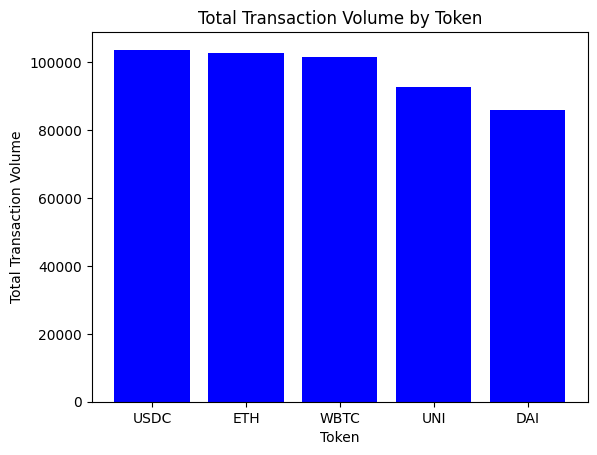

In [18]:
plt.bar(token_volumes.index, token_volumes.values, color = 'blue' )
plt.xlabel('Token')
plt.ylabel('Total Transaction Volume')
plt.title('Total Transaction Volume by Token')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

In [23]:
import sys
print(sys.executable)


/Users/kruyscollins/Documents/Kruys Collins Codes/Problem Solving /Problem-Solver/bin/python


In [27]:
%pip install seaborn
import seaborn as sns
# import pandas as pd

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/c9/0g1167ss6416ywt7xcbg1xhw0000gn/T/ipykernel_9358/286319740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'token', y = 'amount', data = df, estimator = sum, ci = None)


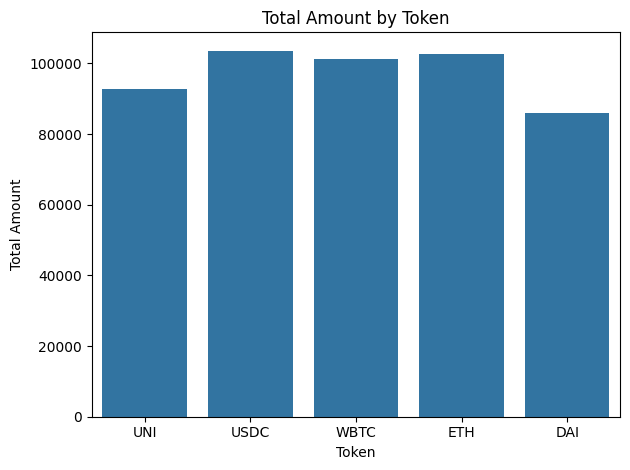

In [31]:
import pandas as pd
sns.barplot(x = 'token', y = 'amount', data = df, estimator = sum, ci = None)
plt.title('Total Amount by Token')
plt.xlabel('Token')
plt.ylabel('Total Amount')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔹 5. Time-based Analysis
Group data by day (timestamp.dt.date) and compute:


Number of transactions per day


Total volume per day


Average transaction size per day

### Number of transactions per day

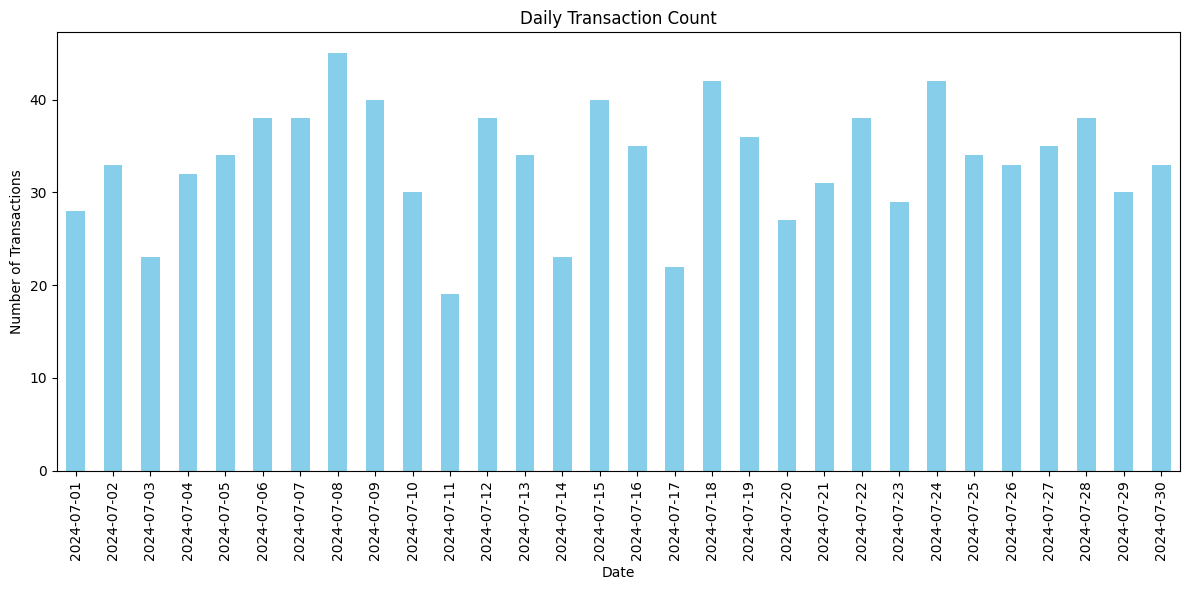

In [32]:
daily_transactions = df.groupby(df['timestamp'].dt.date).size() # Count transactions per day
plt.figure(figsize=(12, 6)) # Set figure size
daily_transactions.plot(kind='bar', color='skyblue') #Plot the daily transaction counts
plt.title('Daily Transaction Count') 
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
# plt.xticks(rotation=45)
plt.tight_layout() #Make sure everything fits well
plt.show() #Display the plot

### Total volume per day

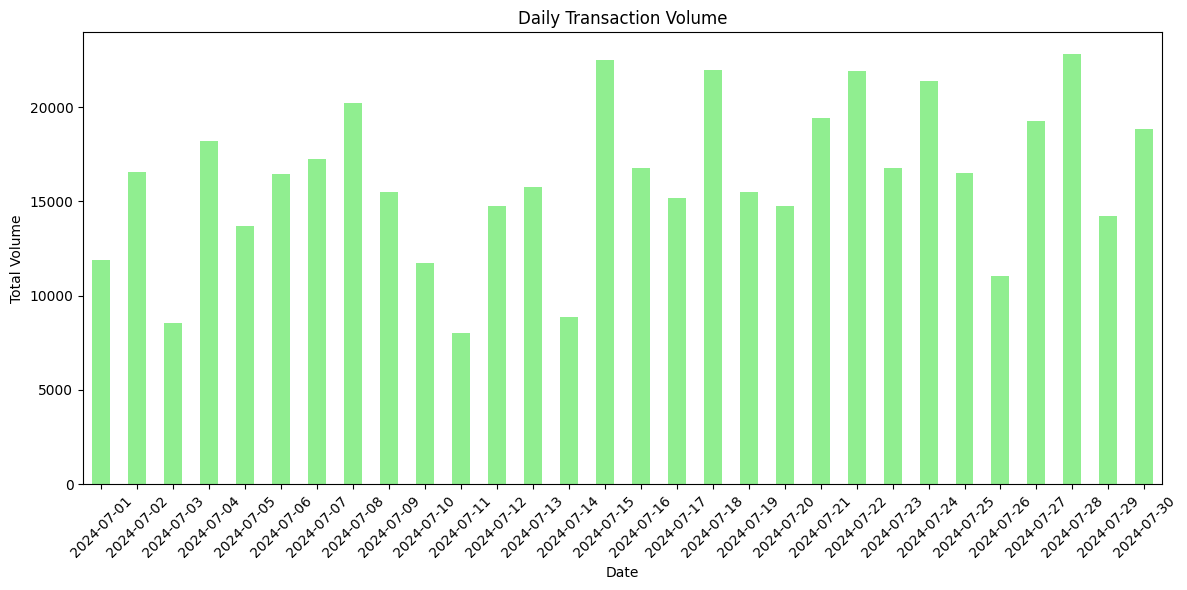

In [33]:
daily_volume = df.groupby(df['timestamp'].dt.date)['amount'].sum() # Total volume per day
plt.figure(figsize=(12, 6)) # Set figure size
daily_volume.plot(kind='bar', color='lightgreen') # Plot the daily transaction volumes
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)   
plt.tight_layout() # Make sure everything fits well
plt.show() # Display the plot

### Average transaction size per day

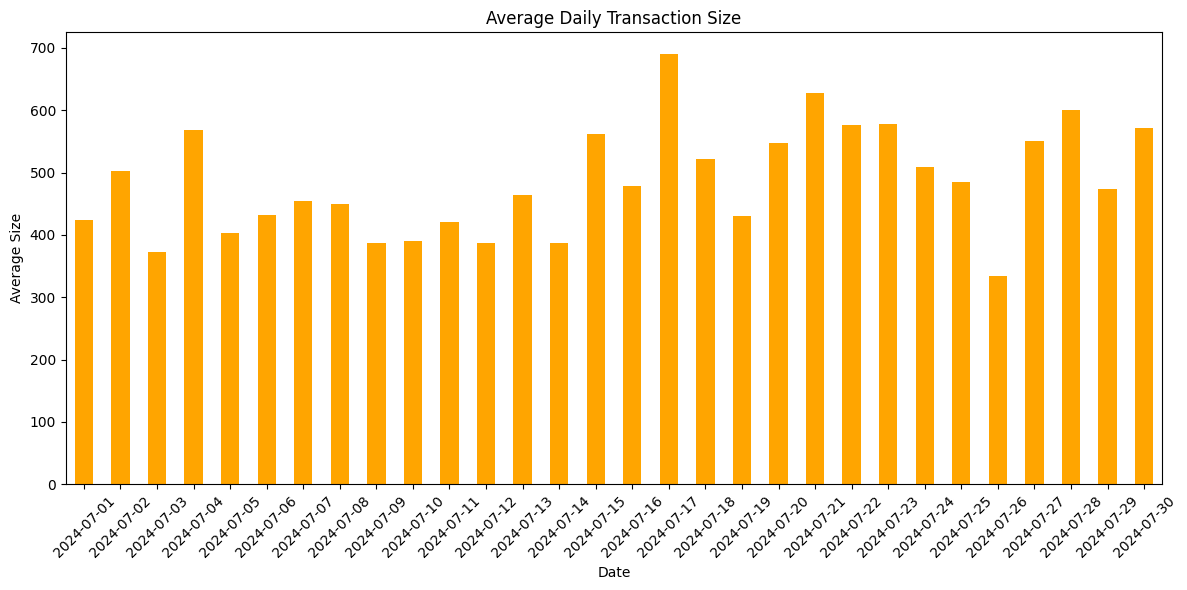

In [34]:
average_daily_size = df.groupby(df['timestamp'].dt.date)['amount'].mean() # Average transaction size per day
plt.figure(figsize=(12, 6)) # Set figure size
average_daily_size.plot(kind='bar', color='orange') # Plot the average daily transaction sizes
plt.title('Average Daily Transaction Size')
plt.xlabel('Date')
plt.ylabel('Average Size')
plt.xticks(rotation=45)
plt.tight_layout() # Make sure everything fits well
plt.show() # Display the plot

## 🔹 6. Gas & Fee Analysis (NumPy + Pandas)
Use numpy to:


Compute total gas used per token


Calculate the average fee in USD using NumPy’s np.mean()


Identify the top 3 most expensive transactions (based on tx_fee_usd).

### Compute total gas used per token

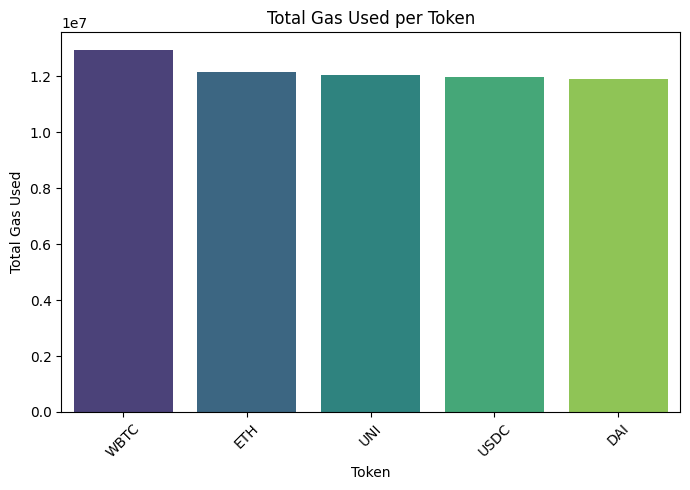

In [43]:
import numpy as np
# Compute total gas used per token
gas_used_per_token = df.groupby('token')['gas_used'].sum().sort_values(ascending=False)
plt.figure(figsize=(7, 5)) # Set figure size
sns.barplot( x = gas_used_per_token.index, y=gas_used_per_token.values, hue=gas_used_per_token.index,  # Assign x to hue
    palette='viridis',
    legend=False)
  # Optional: hides the legend if it's redundant
plt.title('Total Gas Used per Token')
plt.xlabel('Token')
plt.ylabel('Total Gas Used')
plt.xticks(rotation=45)
plt.tight_layout() # Make sure everything fits well
plt.show() # Display the plot   

### Calculate the average fee in USD using NumPy’s np.mean()

In [51]:
average_fee = np.mean(df['tx_fee_usd'])  # Calculate the average fee in USD using NumPy’s np.mean()
print(f"Average Transaction Fee in USD: {average_fee:.2f}")

Average Transaction Fee in USD: 5.25


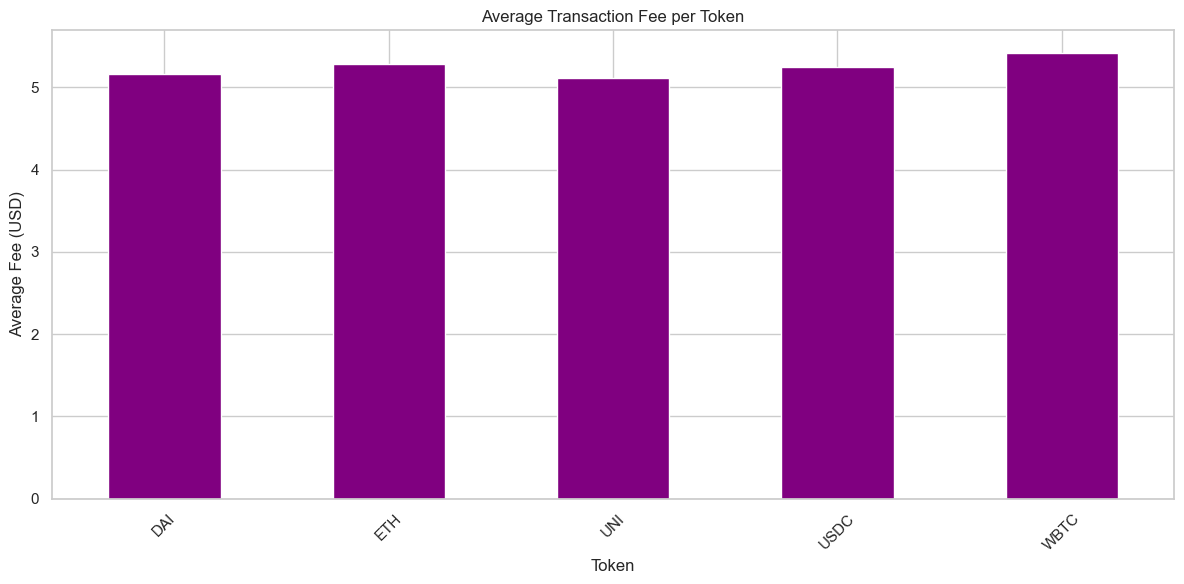

In [50]:
average_fee_per_token = df.groupby('token')['tx_fee_usd'].mean() # Calculate the average fee in USD per token
plt.figure(figsize=(12, 6)) # Set figure size
average_fee_per_token.plot(kind='bar', color='purple') # Plot the average fees per token
plt.title('Average Transaction Fee per Token')
plt.xlabel('Token')
plt.ylabel('Average Fee (USD)')
plt.xticks(rotation=45)
plt.tight_layout() # Make sure everything fits well         
plt.show() # Display the plot

### Identify the top 3 most expensive transactions (based on tx_fee_usd).

In [ ]:
# Display the top 3 most expensive transactions in a table format
top3 = df.nlargest(3, 'tx_fee_usd').copy()
top3_display = top3[['tx_fee_usd', 'sender_wallet', 'receiver_wallet', 'token', 'amount', 'timestamp']].copy()
top3_display.columns = ['Tx Fee (USD)', 'Sender', 'Receiver', 'Token', 'Amount', 'Timestamp']
top3_display['Tx Fee (USD)'] = top3_display['Tx Fee (USD)'].apply(lambda x: f"${x:.2f}")
top3_display['Amount'] = top3_display['Amount'].apply(lambda x: f"{x:.2f}")
top3_display.reset_index(drop=True, inplace=True)
top3_display


,Tx Fee (USD),Sender,Receiver,Token,Amount,Timestamp
0,$9.98,0xb40ff3ae9391ca7df67ba9877a5b1ad2d2e15c5a,0xa10e3155d329183ef464cbc77795c9f3d48d26db,DAI,103.25,2024-07-27 19:37:55
1,$9.98,0xde9626a617067e8c9d9f5e53cf631139b4696d56,0x2d9e724bee9d687f456fcdd2a76132a7d58ada94,ETH,354.24,2024-07-21 08:41:07
2,$9.97,0x44cb7ef9bc0528b331a9c8cbdd555eeda37cf0e4,0x53777175d6fb4679ca72b7d2486e5cefce3cdc56,UNI,652.83,2024-07-26 14:37:35


🔹 7. Advanced Challenges

Create a pivot table: Rows = Token, Columns = Day, Values = Total amount transferred

Use apply() to tag transactions as:
 
low if amount < 100
medium if 100 <= amount <= 1000
high if amount > 1000

Use np.where() to create a binary feature: is_large_tx (1 if amount > 1000, else 0)

In [68]:
df['day'] = pd.to_datetime(df['timestamp']).dt.date  # Extract day from timestamp
pivot_table = df.pivot_table(
    index='token',
    columns='day',
    values='amount',
    aggfunc='sum',
    fill_value=0
)

# print(pivot_table)

def tag_amount(amount):
    if amount < 100:
        return 'low'
    elif 100 <= amount <= 1000:
        return 'medium'
    else:
        return 'high'

df['amount_tag'] = df['amount'].apply(tag_amount)

import numpy as np
df['is_large_tx'] = np.where(df['amount'] > 1000, 1, 0)

# print(df[['amount', 'is_large_tx']].head())

display(df)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,day,amount_tag,is_large_tx
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71,2024-07-27,medium,0
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32,2024-07-14,high,1
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63,2024-07-29,medium,0
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04,2024-07-20,medium,0
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60,2024-07-13,low,0
...,...,...,...,...,...,...,...,...,...,...
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63,2024-07-19,low,0
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24,2024-07-06,high,1
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28,2024-07-29,low,0
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24,2024-07-27,high,1


🔹 8. Bonus (Optional)
Merge two datasets: one for transfers and one for token prices (mock or real)


Add a column for amount_usd = amount * token_price


Recalculate top tokens by USD volume



Concepts Covered:
DataFrame creation and manipulation


Grouping and aggregations


Lambda and apply


NumPy numerical ops


Boolean masking


Sorting, merging, and pivoting


Visualization




 Submission Format:
Github


Include all outputs and code comments


